<a href="https://colab.research.google.com/github/carlosnylander/TrabalhoML/blob/main/Atividade2_Zscore_Binomial_Inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2 – Z-score e Distribuição Binomial

Este notebook responde à atividade usando o dataset fornecido pela vale com medições de corrente elétrica e peso do minério.

As análises estão divididas em:
- **Parte A**: Histogramas por faixas de peso.
- **Parte B**: Simulação e análise de Z-score da corrente instantânea.
- **Parte C**: Simulação de uma distribuição binomial com base na corrente.

---

## Parte A – Histogramas

Agrupamos os dados com base na variável `bal75` (peso do minério na balança) em três faixas:
- leve
- médio
- pesado

E analisamos as distribuições das variáveis `med10` e `sd10` por classe.

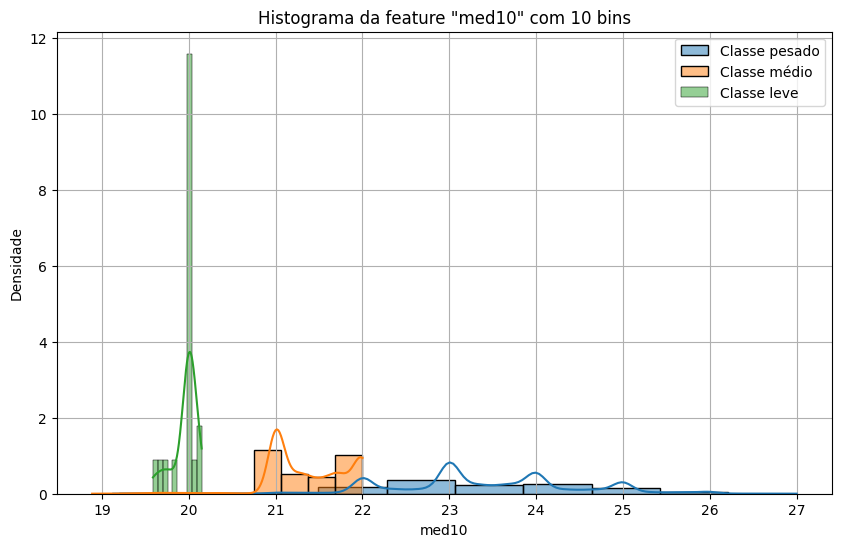

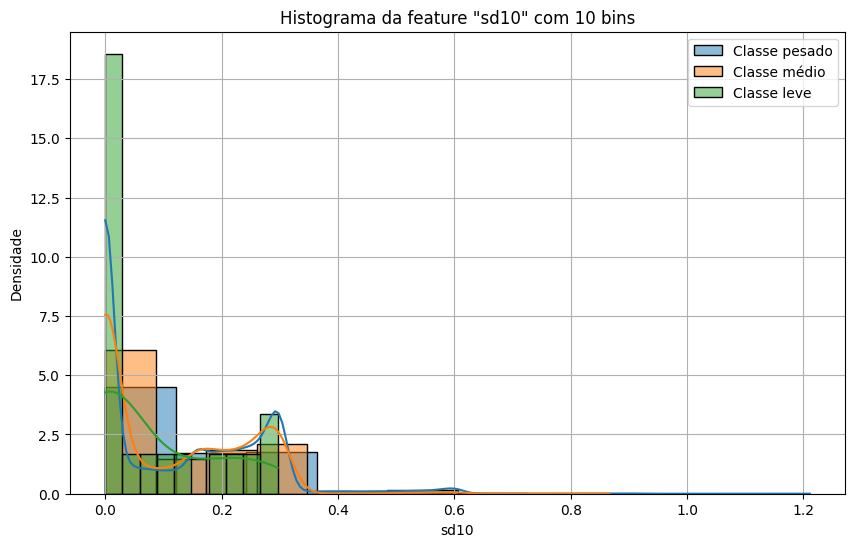

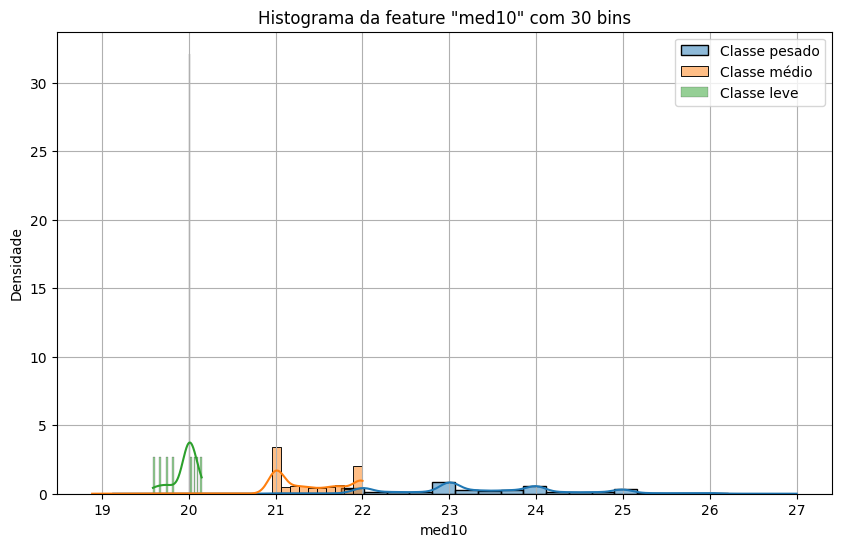

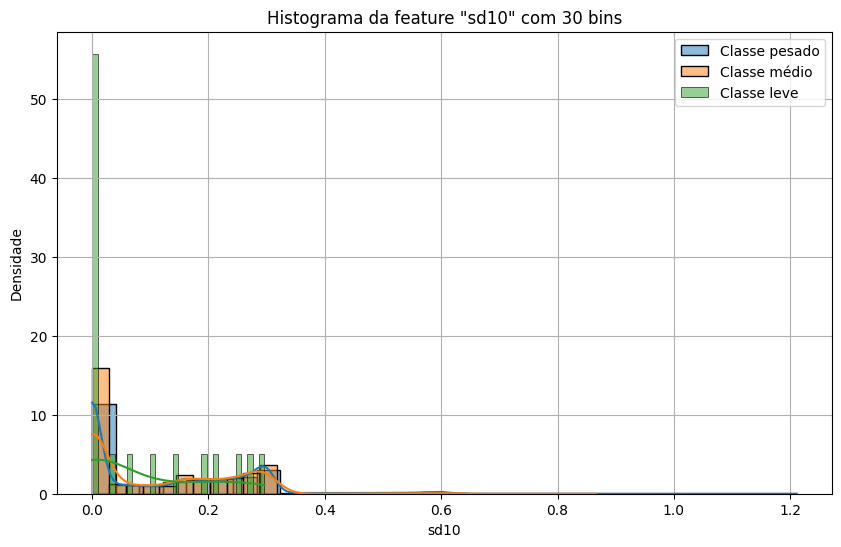

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv('oficialtcld0903.csv')

# Criar classes com base em faixas do peso
df['faixa_peso'] = pd.cut(df['bal75'], bins=3, labels=['leve', 'médio', 'pesado'])

# Features para plotar
features = ['med10', 'sd10']
classes = df['faixa_peso'].unique()
bin_sizes = [10, 30]

for bins in bin_sizes:
    for feature in features:
        plt.figure(figsize=(10, 6))
        for cls in classes:
            sns.histplot(data=df[df['faixa_peso'] == cls], x=feature, label=f'Classe {cls}', kde=True, bins=bins, stat='density')
        plt.title(f'Histograma da feature "{feature}" com {bins} bins')
        plt.legend()
        plt.xlabel(feature)
        plt.ylabel('Densidade')
        plt.grid(True)
        plt.show()

## Parte B – Z-score e distribuição normal

Usamos a corrente instantânea (`TCSacr`) para calcular a probabilidade de uma leitura estar abaixo de determinado valor.

Agora, o valor observado é escolhido automaticamente como **média + 1 desvio padrão**, representando uma leitura acima da média.

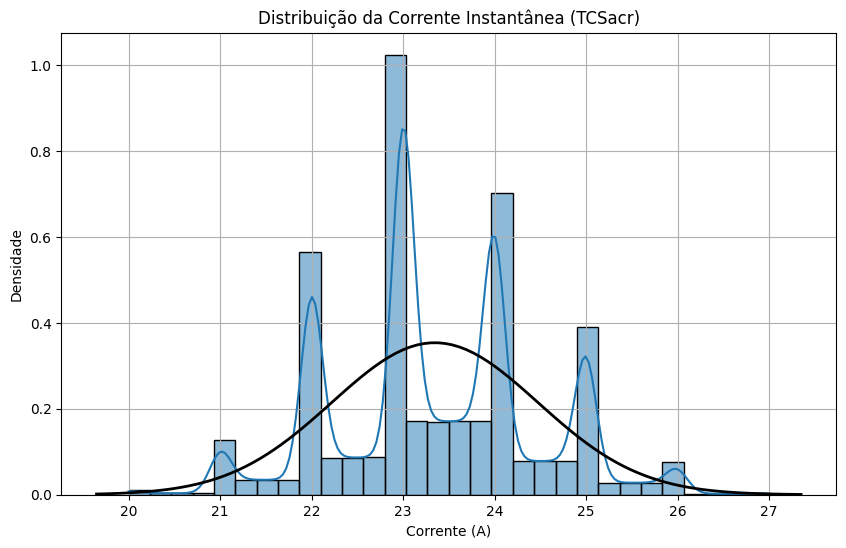

Média: 23.35, Desvio padrão: 1.13
Valor observado (corrente): 24.47 A (média + 1 desvio)
Z-score = 1.00
Probabilidade de TCSacr < 24.47 A = 0.8413


In [3]:
import numpy as np
from scipy.stats import norm

dados = df['TCSacr'].dropna()

# Histograma com curva normal
plt.figure(figsize=(10, 6))
sns.histplot(dados, bins=30, kde=True, stat='density')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(dados), np.std(dados))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Distribuição da Corrente Instantânea (TCSacr)")
plt.xlabel("Corrente (A)")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

# Cálculo do Z-score para um valor automaticamente definido
media = np.mean(dados)
desvio = np.std(dados)
x_obs = media + desvio  # Valor observado definido dinamicamente
z = (x_obs - media) / desvio
prob = norm.cdf(z)

print(f"Média: {media:.2f}, Desvio padrão: {desvio:.2f}")
print(f"Valor observado (corrente): {x_obs:.2f} A (média + 1 desvio)")
print(f"Z-score = {z:.2f}")
print(f"Probabilidade de TCSacr < {x_obs:.2f} A = {prob:.4f}")

## Parte C – Distribuição Binomial

Suponha que, de 10 leituras de corrente, esperamos que 80% estejam acima de 100A. Calculamos a probabilidade de 8 ou mais estarem acima disso, e simulamos amostras.

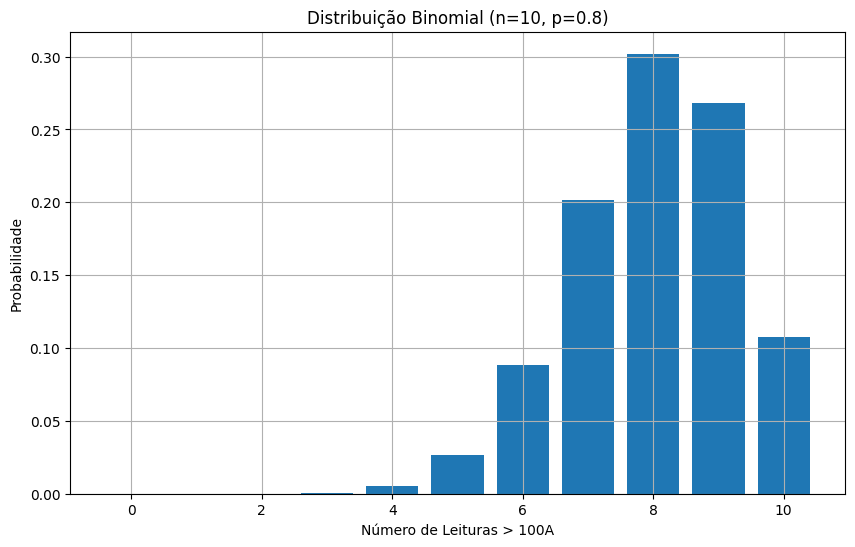

Amostras simuladas: [10  9  7  8  9  5  8  7  7  7]


In [4]:
from scipy.stats import binom

n = 10  # número de leituras
p = 0.8  # probabilidade de sucesso (corrente > 100A)
x = list(range(n + 1))

probs = binom.pmf(x, n, p)

plt.figure(figsize=(10, 6))
plt.bar(x, probs)
plt.title(f'Distribuição Binomial (n={n}, p={p})')
plt.xlabel('Número de Leituras > 100A')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()

# Simular amostras
amostras = binom.rvs(n, p, size=10)
print(f"Amostras simuladas: {amostras}")